Phase 1: Setup and Data Sourcing 🖥️

In [1]:
# Import the pandas library, which is the standard for data analysis in Python
import pandas as pd

# Load the dataset from the CSV file into a pandas DataFrame
# A DataFrame is essentially a table, like a spreadsheet
df = pd.read_csv('ai4i2020.csv')

# Display the first 5 rows of the DataFrame to confirm it loaded correctly
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


Phase 2: Data Cleaning and Exploration 📊

# Get a concise summary of the DataFrame
# This will show us column names, the number of non-null values, and the data type of each column
df.info()

In [3]:
# Generate descriptive statistics for all numerical columns
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [4]:
# Count the occurrences of each value in the 'Machine failure' column
# 0 = No Failure, 1 = Failure
df['Machine failure'].value_counts()

Machine failure
0    9661
1     339
Name: count, dtype: int64

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for our plots
sns.set_style('whitegrid')

# 1. Visualize the machine failure counts
plt.figure(figsize=(8, 5))
sns.countplot(x='Machine failure', data=df)
plt.title('Distribution of Machine Failures')
plt.xlabel('Failure Status (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

# 2. Visualize the distribution of a few key sensor readings
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Distribution of Key Sensor Readings')

sns.histplot(df['Air temperature [K]'], ax=axes[0], kde=True, color='skyblue')
axes[0].set_title('Air Temperature')

sns.histplot(df['Process temperature [K]'], ax=axes[1], kde=True, color='salmon')
axes[1].set_title('Process Temperature')

sns.histplot(df['Rotational speed [rpm]'], ax=axes[2], kde=True, color='lightgreen')
axes[2].set_title('Rotational Speed')

plt.show()

Phase 3: Feature Engineering 🔧

In [6]:
# --- Step 1: Create a Temperature Difference Feature ---
# Logic: The difference between the process and air temperature might indicate strain or inefficiency.
df['Temp_Diff [K]'] = df['Process temperature [K]'] - df['Air temperature [K]']


# --- Step 2: Create a Power Feature ---
# Logic: Power is a function of rotational speed and torque and can be a strong indicator of load.
# Formula: Power (W) = Torque (Nm) * Rotational Speed (rad/s)
# We convert rpm to rad/s by multiplying by (2 * pi / 60)
df['Power [W]'] = df['Torque [Nm]'] * (df['Rotational speed [rpm]'] * (2 * 3.14159 / 60))


# --- Step 3: Handle the Categorical 'Type' Column ---
# Logic: ML models need numbers, not text. We use one-hot encoding to convert the 'Type' column ('L', 'M', 'H')
# into numerical columns.
df_encoded = pd.get_dummies(df, columns=['Type'], drop_first=True)


# --- Step 4: Verify the New Features ---
# Display the first few rows to see our new 'Temp_Diff', 'Power', and 'Type' columns.
print("DataFrame with new features:")
df_encoded.head()

DataFrame with new features:


,UDI,Product ID,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Temp_Diff [K],Power [W],Type_L,Type_M
0,1,M14860,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,10.5,6951.584688,False,True
1,2,L47181,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,10.5,6826.716958,True,False
2,3,L47182,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,10.4,7749.380997,True,False
3,4,L47183,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,10.4,5927.499652,True,False
4,5,L47184,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,10.5,5897.811627,True,False


Phase 4: Pattern Analysis & Modeling 🤖

In [7]:
# Import necessary libraries from scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# --- Step 1: Define Features (X) and Target (y) ---
# Features are the inputs the model learns from.
# We drop the original failure columns and identifiers.
X = df_encoded.drop(['UDI', 'Product ID', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1)

# The target is what we want to predict.
y = df_encoded['Machine failure']


# --- Step 2: Split Data into Training and Testing Sets ---
# 80% of data will be for training the model, 20% for testing its performance.
# random_state ensures we get the same split every time we run the code.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# --- Step 3: Train the Random Forest Model ---
# We create an instance of the model.
# class_weight='balanced' tells the model to pay more attention to the rare 'failure' class.
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# We train the model on the training data.
rf_model.fit(X_train, y_train)


# --- Step 4: Make Predictions and Evaluate the Model ---
# The model makes predictions on the test data it has never seen before.
y_pred = rf_model.predict(X_test)

# Print the evaluation metrics.
print("--- Confusion Matrix ---")
print(confusion_matrix(y_test, y_pred))
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

--- Confusion Matrix ---
[[1929    3]
 [  19   49]]

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1932
           1       0.94      0.72      0.82        68

    accuracy                           0.99      2000
   macro avg       0.97      0.86      0.91      2000
weighted avg       0.99      0.99      0.99      2000



Phase 5: Deriving Insights and Recommendations 💡

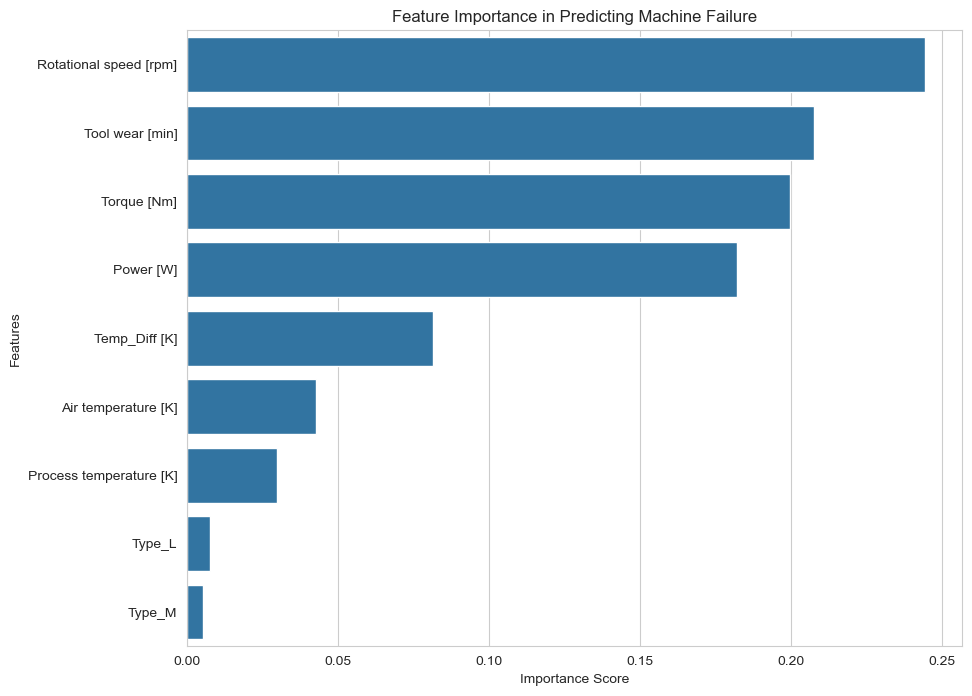

In [8]:
# Create a pandas Series to view feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importance in Predicting Machine Failure')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

Phase 6: Reporting and Communication 📄